<a href="https://colab.research.google.com/github/AmeerMohammadJafari/TensorFlow-and-Keras-mini-projects/blob/main/02_IMDB/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Decode some review back to text

In [6]:
word_index = imdb.get_word_index()
# we should reverse this dict
index_to_word = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [index_to_word.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Encoding integer lists via multi-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros(shape=(len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train.shape, y_test.shape

((25000,), (25000,))

Defining model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
from keras.api._v2.keras import activations
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/30
49/49 [==============================] - 9s 164ms/step - loss: 0.4993 - accuracy: 0.8092 - val_loss: 0.3691 - val_accuracy: 0.8728
Epoch 2/30
49/49 [==============================] - 3s 62ms/step - loss: 0.2938 - accuracy: 0.8962 - val_loss: 0.3127 - val_accuracy: 0.8740
Epoch 3/30
49/49 [==============================] - 3s 62ms/step - loss: 0.2287 - accuracy: 0.9141 - val_loss: 0.2879 - val_accuracy: 0.8845
Epoch 4/30
49/49 [==============================] - 2s 48ms/step - loss: 0.1927 - accuracy: 0.9303 - val_loss: 0.3113 - val_accuracy: 0.8727
Epoch 5/30
49/49 [==============================] - 3s 59ms/step - loss: 0.1701 - accuracy: 0.9381 - val_loss: 0.3191 - val_accuracy: 0.8736
Epoch 6/30
49/49 [==============================] - 4s 75ms/step - loss: 0.1513 - accuracy: 0.9460 - val_loss: 0.3050 - val_accuracy: 0.8817
Epoch 7/30
49/49 [==============================] - 4s 73ms/step - loss: 0.1372 - accuracy: 0.9515 - val_loss: 0.3218 - val_accuracy: 0.8784
Epoch 8/30
4

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
import matplotlib.pyplot as plt
def plot_losses(history_dict):
    train_loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(train_loss_values) + 1)
    plt.plot(epochs, train_loss_values, 'r', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title("Losses")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

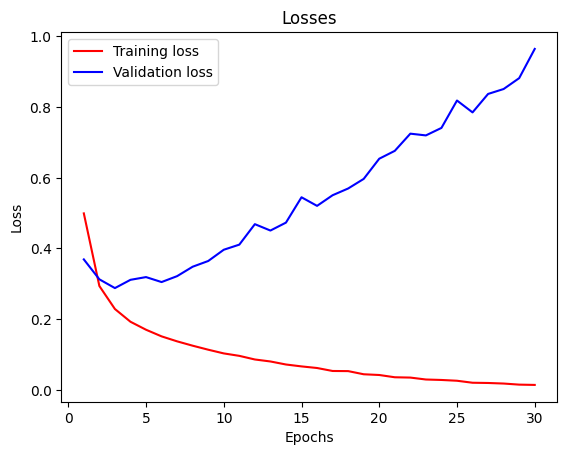

In [18]:
plot_losses(history_dict)

In [21]:
def plot_accuracies(history_dict):
    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

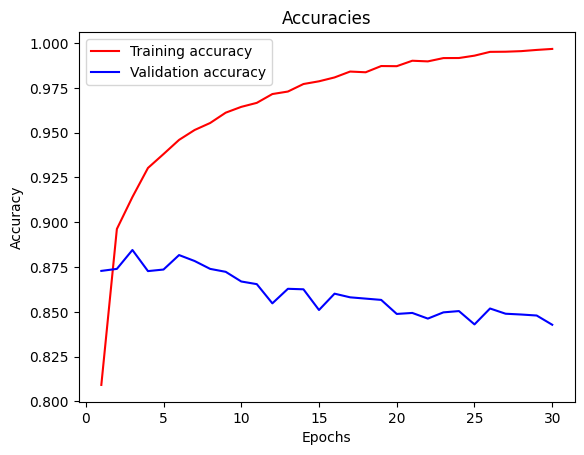

In [22]:
plot_accuracies(history_dict)

Facing overfitting, early stopping could be a good idea

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/4
49/49 [==============================] - 7s 140ms/step - loss: 0.4720 - accuracy: 0.8054 - val_loss: 0.3597 - val_accuracy: 0.8632
Epoch 2/4
49/49 [==============================] - 3s 69ms/step - loss: 0.2744 - accuracy: 0.9019 - val_loss: 0.2852 - val_accuracy: 0.8892
Epoch 3/4
49/49 [==============================] - 3s 64ms/step - loss: 0.2165 - accuracy: 0.9212 - val_loss: 0.2778 - val_accuracy: 0.8889
Epoch 4/4
49/49 [==============================] - 4s 78ms/step - loss: 0.1850 - accuracy: 0.9325 - val_loss: 0.2860 - val_accuracy: 0.8868


In [24]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

782/782 [==============================] - 3s 4ms/step - loss: 0.2860 - accuracy: 0.8868


(0.28602874279022217, 0.8868399858474731)

In [25]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.21747062],
       [0.9990197 ],
       [0.9374928 ],
       ...,
       [0.14034495],
       [0.07676511],
       [0.6986806 ]], dtype=float32)

Try using some simpler models

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 9s 164ms/step - loss: 0.4493 - accuracy: 0.8232 - val_loss: 0.3506 - val_accuracy: 0.8786
Epoch 2/20
49/49 [==============================] - 3s 69ms/step - loss: 0.2853 - accuracy: 0.9024 - val_loss: 0.3149 - val_accuracy: 0.8745
Epoch 3/20
49/49 [==============================] - 3s 60ms/step - loss: 0.2326 - accuracy: 0.9186 - val_loss: 0.2807 - val_accuracy: 0.8898
Epoch 4/20
49/49 [==============================] - 3s 61ms/step - loss: 0.2035 - accuracy: 0.9300 - val_loss: 0.2797 - val_accuracy: 0.8878
Epoch 5/20
49/49 [==============================] - 3s 59ms/step - loss: 0.1823 - accuracy: 0.9374 - val_loss: 0.2793 - val_accuracy: 0.8880
Epoch 6/20
49/49 [==============================] - 3s 71ms/step - loss: 0.1675 - accuracy: 0.9429 - val_loss: 0.2847 - val_accuracy: 0.8852
Epoch 7/20
49/49 [==============================] - 4s 81ms/step - loss: 0.1551 - accuracy: 0.9470 - val_loss: 0.2944 - val_accuracy: 0.8821
Epoch 8/20
4

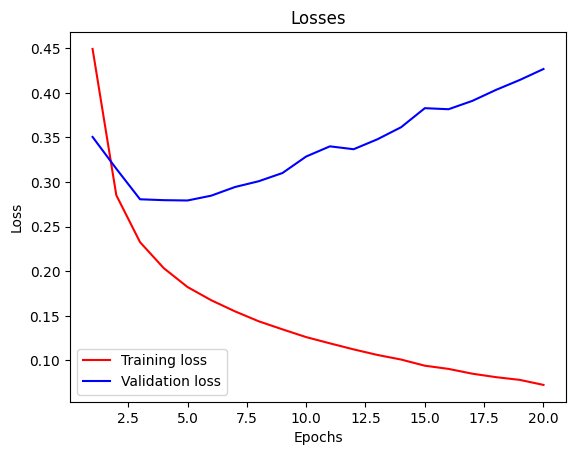

In [27]:
plot_losses(history.history)

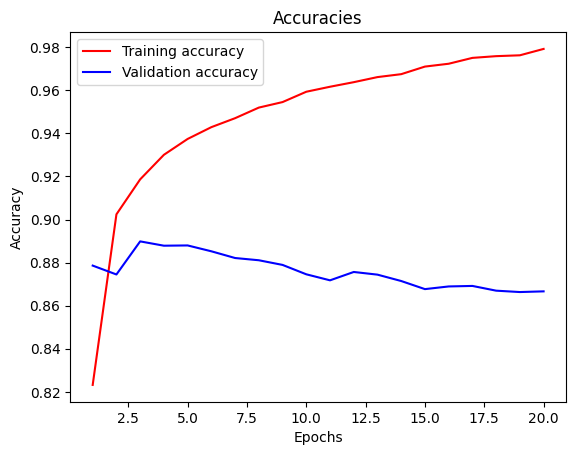

In [28]:
plot_accuracies(history.history)

Epoch 1/20
49/49 [==============================] - 5s 91ms/step - loss: 0.5096 - accuracy: 0.8210 - val_loss: 0.4247 - val_accuracy: 0.8520
Epoch 2/20
49/49 [==============================] - 3s 64ms/step - loss: 0.3501 - accuracy: 0.8872 - val_loss: 0.3397 - val_accuracy: 0.8792
Epoch 3/20
49/49 [==============================] - 3s 67ms/step - loss: 0.2817 - accuracy: 0.9049 - val_loss: 0.3042 - val_accuracy: 0.8863
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2426 - accuracy: 0.9166 - val_loss: 0.2875 - val_accuracy: 0.8889
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2163 - accuracy: 0.9262 - val_loss: 0.2793 - val_accuracy: 0.8892
Epoch 6/20
49/49 [==============================] - 3s 57ms/step - loss: 0.1968 - accuracy: 0.9320 - val_loss: 0.2772 - val_accuracy: 0.8897
Epoch 7/20
49/49 [==============================] - 3s 60ms/step - loss: 0.1818 - accuracy: 0.9377 - val_loss: 0.2836 - val_accuracy: 0.8856
Epoch 8/20
49

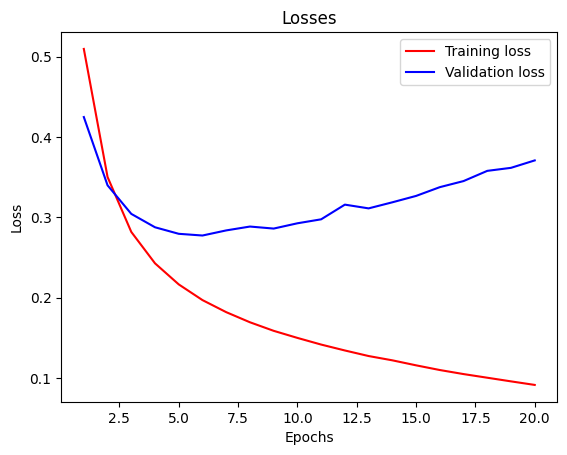

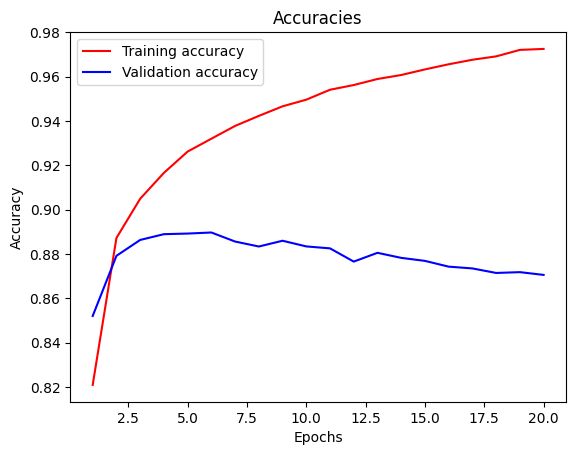

In [29]:
model = keras.Sequential([
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

plot_losses(history.history)
plot_accuracies(history.history)